<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-05 03:22:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  53.1MB/s    in 3.7s    

2025-07-05 03:22:58 (54.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [6]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


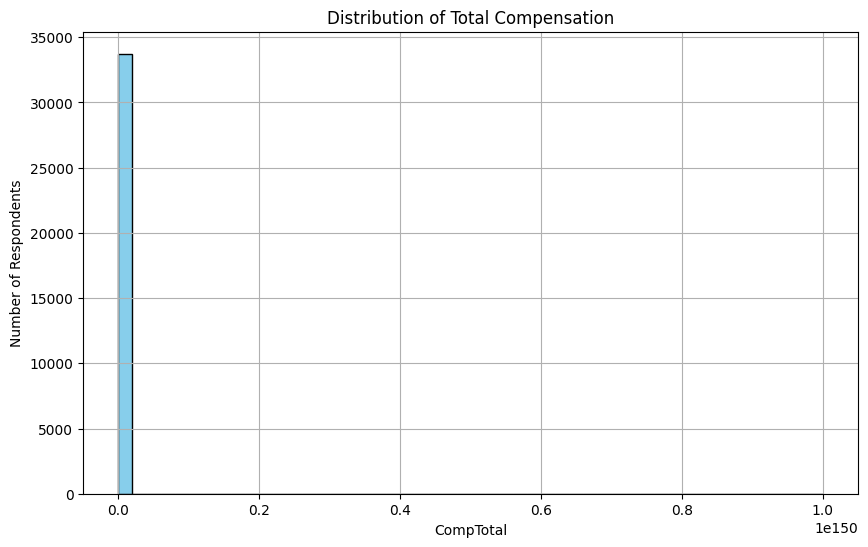

In [13]:
## Write your code here
# Read the data into a DataFrame
QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Drop null values to avoid plotting errors
df = df.dropna()

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('CompTotal')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


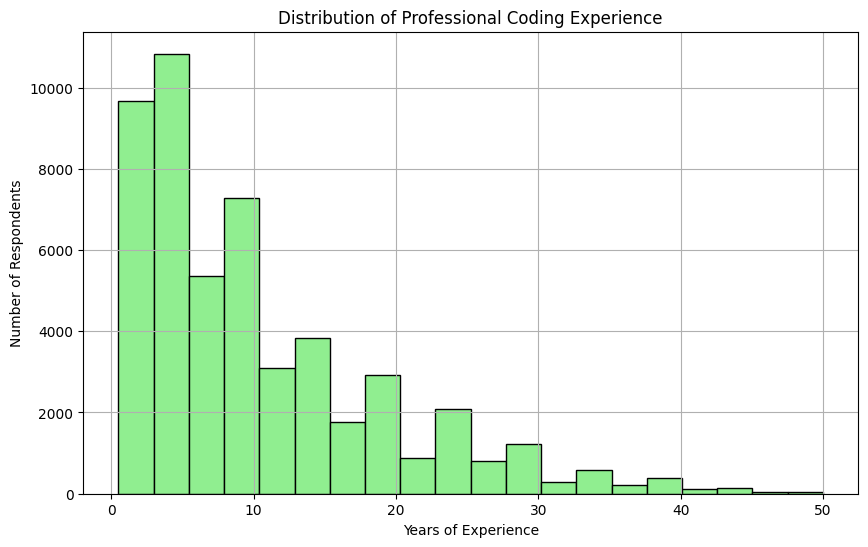

In [14]:
## Write your code here
import matplotlib.pyplot as plt

# Query the data from the database
QUERY = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(QUERY, conn)

# Drop nulls and convert to numeric (some values might be non-numeric like 'Less than 1 year')
df = df.dropna()
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', '0.5')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df = df.dropna()

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(df['YearsCodePro'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


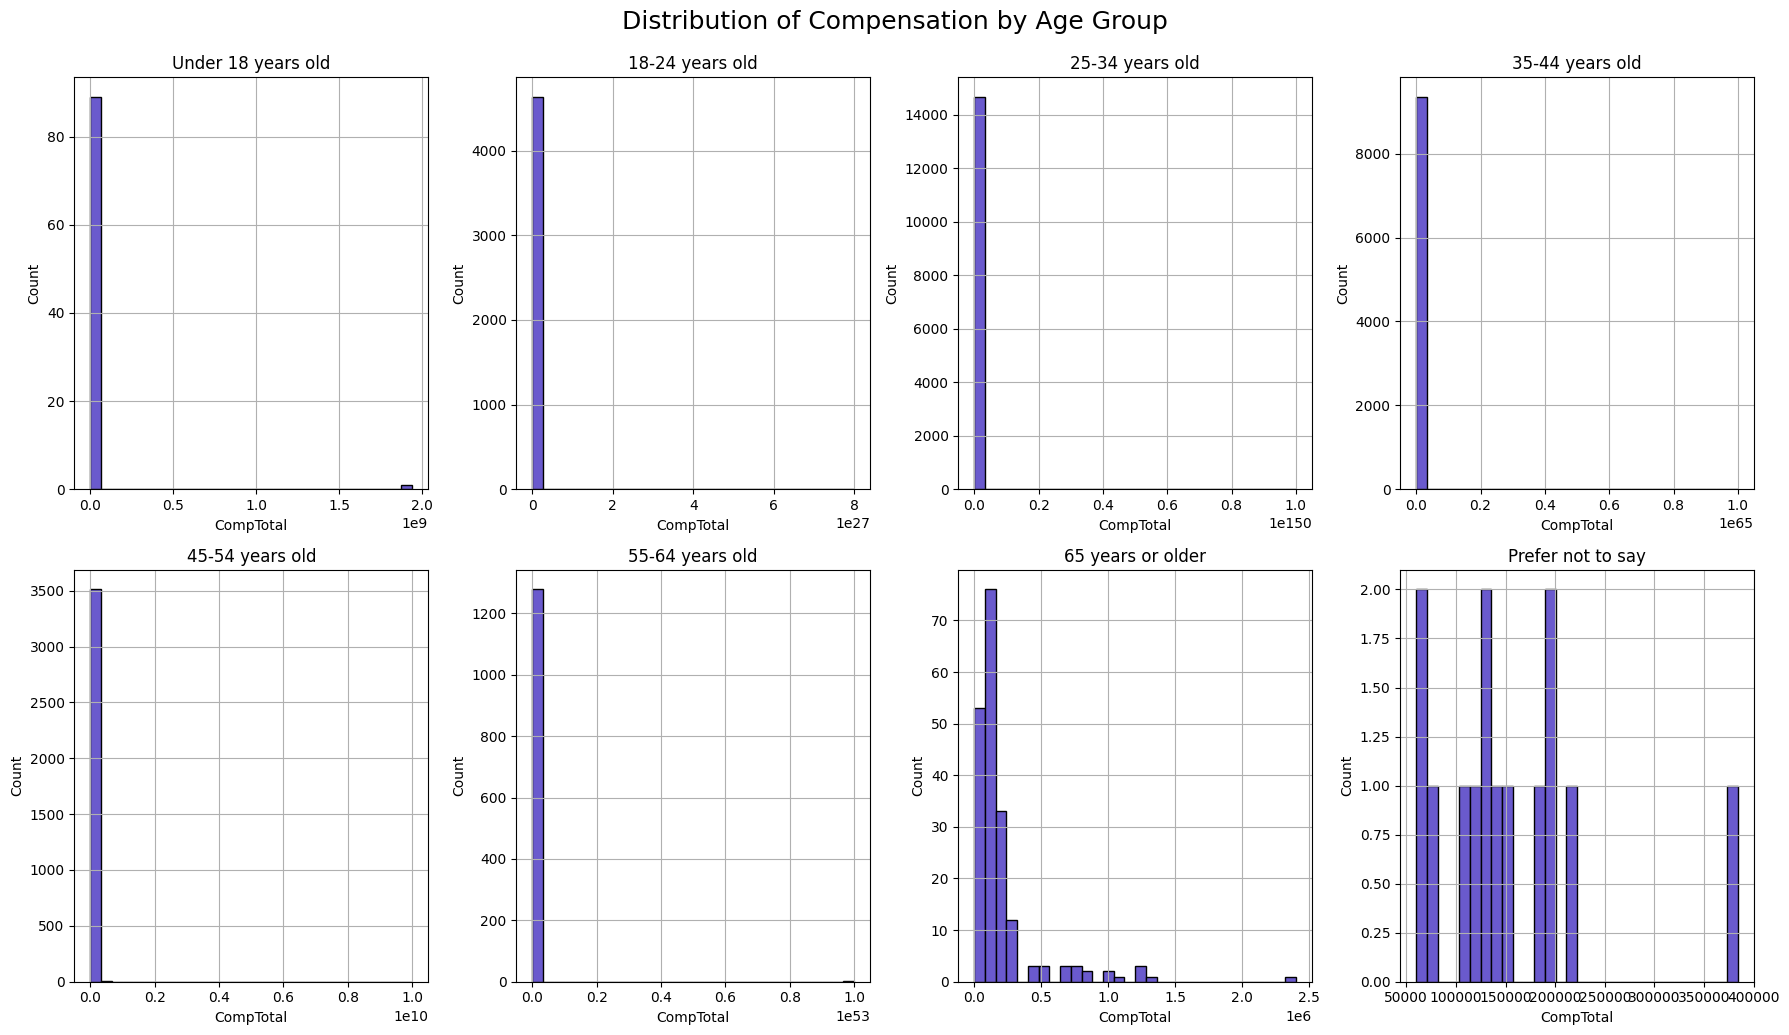

In [15]:
## Write your code here
import matplotlib.pyplot as plt

# Query relevant data from database
QUERY = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Clean and prepare data
df = df.dropna(subset=['Age', 'CompTotal'])
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Define age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]

# Set up subplots: 2 rows × 4 columns
fig, axs = plt.subplots(2, 4, figsize=(18, 10))
axs = axs.ravel()

# Plot histogram for each age group
for i, age_group in enumerate(age_order):
    data = df[df['Age'] == age_group]['CompTotal']
    axs[i].hist(data, bins=30, color='slateblue', edgecolor='black')
    axs[i].set_title(age_group)
    axs[i].set_xlabel('CompTotal')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)

# Overall layout
plt.tight_layout()
plt.suptitle('Distribution of Compensation by Age Group', fontsize=18, y=1.03)
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


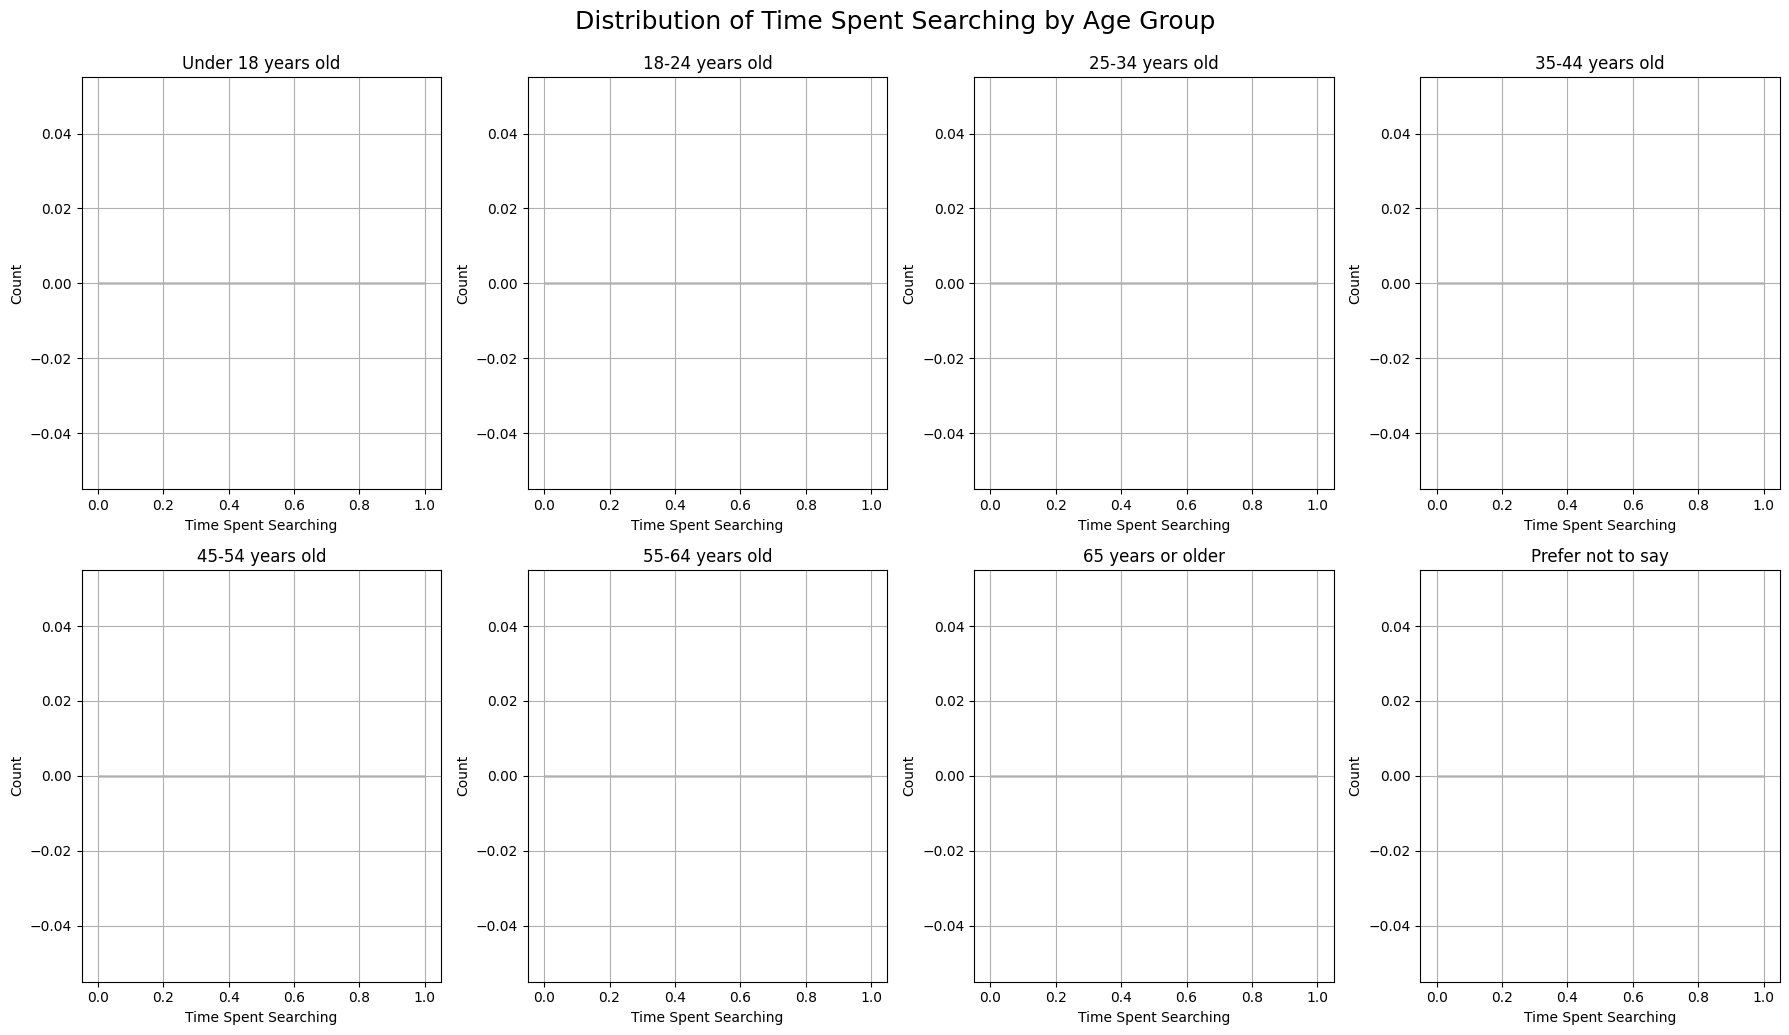

In [17]:
## Write your code here
import matplotlib.pyplot as plt

# Query relevant columns from the database
QUERY = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql_query(QUERY, conn)

# Clean data
df = df.dropna(subset=['Age', 'TimeSearching'])
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df = df.dropna(subset=['TimeSearching'])

# Define consistent age order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]

# Create subplots: 2 rows × 4 columns
fig, axs = plt.subplots(2, 4, figsize=(18, 10))
axs = axs.ravel()

# Plot histogram for each age group
for i, age_group in enumerate(age_order):
    data = df[df['Age'] == age_group]['TimeSearching']
    axs[i].hist(data, bins=20, color='mediumseagreen', edgecolor='black')
    axs[i].set_title(age_group)
    axs[i].set_xlabel('Time Spent Searching')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)

# Tidy up layout
plt.tight_layout()
plt.suptitle('Distribution of Time Spent Searching by Age Group', fontsize=18, y=1.03)
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


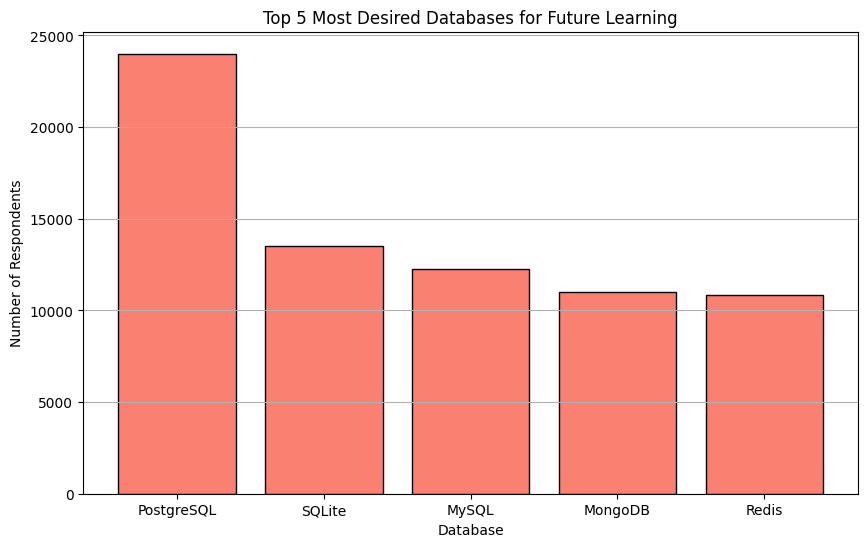

In [18]:
## Write your code here
import matplotlib.pyplot as plt

# Step 1: Query the relevant data
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql_query(QUERY, conn)

# Step 2: Drop nulls and split entries by semicolon
df = df.dropna()
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')

# Step 3: Flatten the list and count occurrences
from collections import Counter
database_list = [db.strip() for sublist in df['DatabaseWantToWorkWith'] for db in sublist]
database_counts = Counter(database_list)

# Step 4: Extract top 5 databases
top_5 = database_counts.most_common(5)
db_names, db_values = zip(*top_5)

# Step 5: Plot histogram
plt.figure(figsize=(10,6))
plt.bar(db_names, db_values, color='salmon', edgecolor='black')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.grid(axis='y')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


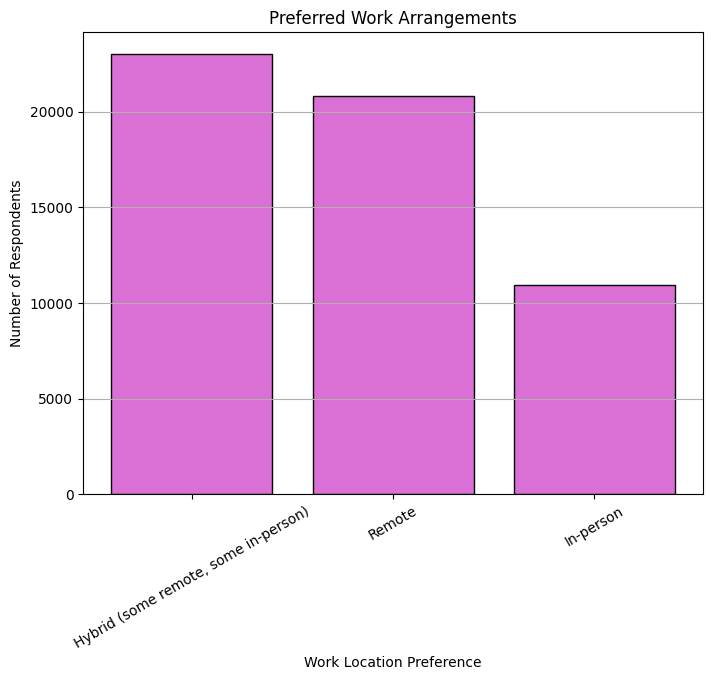

In [19]:
## Write your code here
import matplotlib.pyplot as plt

# Step 1: Query the preferred work locations
QUERY = "SELECT RemoteWork FROM main"
df = pd.read_sql_query(QUERY, conn)

# Step 2: Clean the data
df = df.dropna()

# Step 3: Count preferences
work_prefs = df['RemoteWork'].value_counts()

# Step 4: Plot the histogram (categorical style)
plt.figure(figsize=(8,6))
plt.bar(work_prefs.index, work_prefs.values, color='orchid', edgecolor='black')
plt.title('Preferred Work Arrangements')
plt.xlabel('Work Location Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


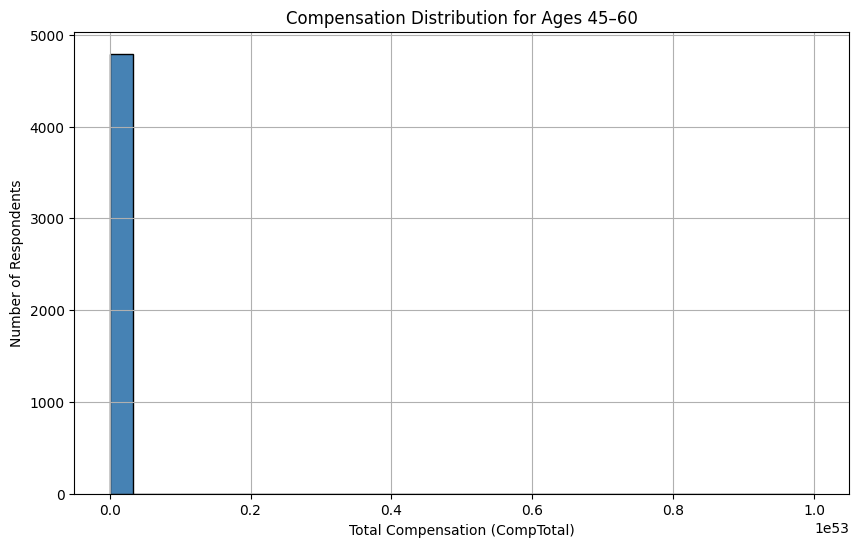

In [20]:
## Write your code here
import matplotlib.pyplot as plt

# Query age and compensation
QUERY = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Clean and prep data
df = df.dropna(subset=['Age', 'CompTotal'])
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Filter for age group: 45–54 and 55–64 years old
target_ages = ['45-54 years old', '55-64 years old']
df_midcareer = df[df['Age'].isin(target_ages)]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_midcareer['CompTotal'], bins=30, color='steelblue', edgecolor='black')
plt.title('Compensation Distribution for Ages 45–60')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


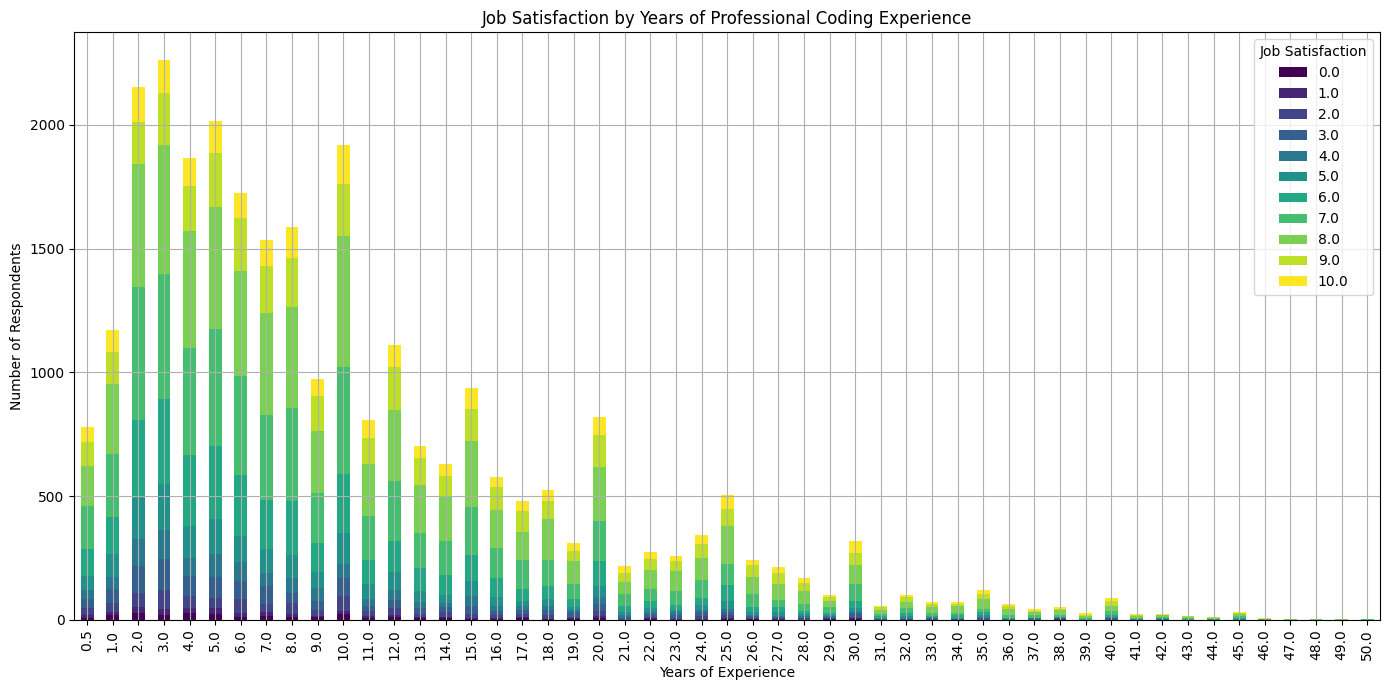

In [21]:
## Write your code here
import matplotlib.pyplot as plt

# Step 1: Query JobSat and YearsCodePro
QUERY = "SELECT JobSat, YearsCodePro FROM main"
df = pd.read_sql_query(QUERY, conn)

# Step 2: Clean the data
df = df.dropna(subset=['JobSat', 'YearsCodePro'])
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', '0.5')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df = df.dropna(subset=['YearsCodePro'])

# Step 3: Group data by experience and count JobSat responses
job_sat_counts = df.groupby(['YearsCodePro', 'JobSat']).size().unstack().fillna(0)

# Step 4: Plot histogram-like stacked bar chart
job_sat_counts.plot(kind='bar', stacked=True, figsize=(14,7), colormap='viridis')
plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.legend(title='Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [22]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
